In [1]:
# Define model parameters
num_rates = 10  # Number of forward rates to model
tenor = 0.25  # Tenor length (e.g., 3 months)
maturities = [tenor * (i + 1) for i in range(num_rates)]  # List of maturities
volatilities = [0.2 for _ in range(num_rates)]  # Example volatilities for each forward rate


In [2]:
import numpy as np

# Simulate forward rates under lognormal process
def simulate_forward_rates(initial_rates, volatilities, maturities, num_simulations, time_step):
    forward_rates = np.zeros((num_simulations, len(initial_rates)))
    for i in range(num_simulations):
        for j in range(len(initial_rates)):
            drift = 0  # Simplified; real drift depends on specific measure
            diffusion = volatilities[j] * np.sqrt(time_step) * np.random.normal()
            forward_rates[i, j] = initial_rates[j] * np.exp(drift + diffusion)
    return forward_rates

initial_rates = [0.05 for _ in range(num_rates)]  # Example initial forward rates
num_simulations = 1000
time_step = 1 / 252  # Daily steps

simulated_rates = simulate_forward_rates(initial_rates, volatilities, maturities, num_simulations, time_step)


In [3]:
from scipy.stats import norm

# Black model formula for caplet pricing
def black_caplet_price(forward_rate, strike, volatility, maturity, notional):
    d1 = (np.log(forward_rate / strike) + 0.5 * volatility**2 * maturity) / (volatility * np.sqrt(maturity))
    d2 = d1 - volatility * np.sqrt(maturity)
    caplet_price = notional * (forward_rate * norm.cdf(d1) - strike * norm.cdf(d2))
    return caplet_price

# Price caplets for all forward rates
strike = 0.05  # Example strike rate
notional = 1e6  # Example notional amount
caplet_prices = []

for j in range(len(initial_rates)):
    price = black_caplet_price(initial_rates[j], strike, volatilities[j], maturities[j], notional)
    caplet_prices.append(price)

print("Caplet Prices:", caplet_prices)


Caplet Prices: [np.float64(1993.880583837246), np.float64(2818.5988898508303), np.float64(3450.6276720216442), np.float64(3982.7837277029016), np.float64(4451.0353744683025), np.float64(4873.837491116029), np.float64(5262.1578905626275), np.float64(5623.145800914244), np.float64(5961.769237024253), np.float64(6281.646941855415)]


In [4]:
# Monte Carlo simulation for pricing an exotic derivative (e.g., Bermudan swaption)
def monte_carlo_bermudan_swaption(initial_rates, volatilities, maturities, num_simulations, time_step, notional):
    payoffs = np.zeros(num_simulations)
    for i in range(num_simulations):
        rates = initial_rates.copy()
        for t in range(len(maturities)):
            # Simulate forward rates
            drift = 0  # Simplified; real drift depends on specific measure
            diffusion = volatilities[t] * np.sqrt(time_step) * np.random.normal()
            rates[t] = rates[t] * np.exp(drift + diffusion)
            
            # Calculate payoff (simplified example)
            if rates[t] > strike:  # Example condition for Bermudan swaption exercise
                payoffs[i] = notional * (rates[t] - strike)
                break
    
    # Discounted average payoff
    discount_factor = np.exp(-initial_rates[0] * maturities[-1])
    swaption_price = discount_factor * np.mean(payoffs)
    return swaption_price

strike = 0.05  # Example strike rate
swaption_price = monte_carlo_bermudan_swaption(initial_rates, volatilities, maturities, num_simulations, time_step, notional)
print("Bermudan Swaption Price:", swaption_price)


Bermudan Swaption Price: 438.8699055105767


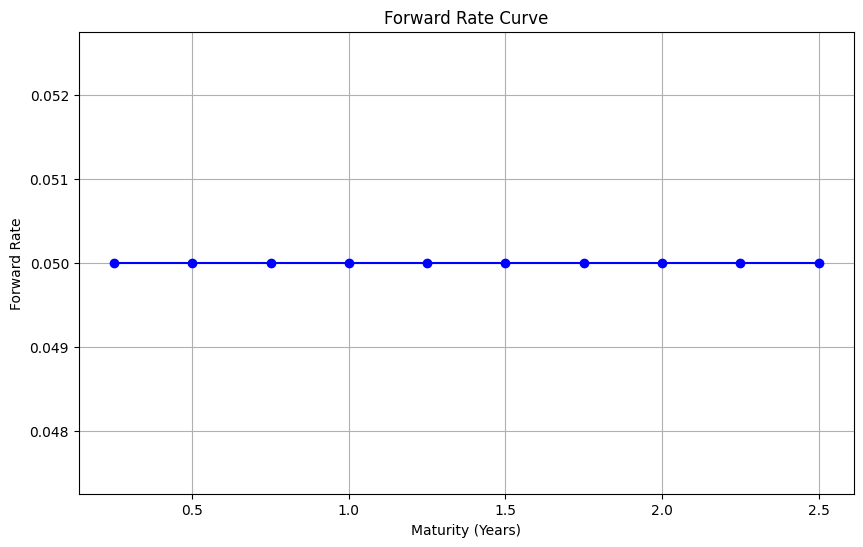

In [6]:
import matplotlib.pyplot as plt
# Redefine parameters due to reset state
num_rates = 10  # Number of forward rates to model
tenor = 0.25  # Tenor length (e.g., 3 months)
initial_rates = [0.05 for _ in range(num_rates)]  # Example initial forward rates
maturities = [tenor * (i + 1) for i in range(num_rates)]  # List of maturities

# Plot the forward rate curve
plt.figure(figsize=(10, 6))
plt.plot(maturities, initial_rates, marker='o', linestyle='-', color='b')
plt.title('Forward Rate Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Forward Rate')
plt.grid(True)
plt.show()
